三角函数，考虑一下向量v1= [1, 2, 3]，v1和向量 v2=0.5×v1 之间的角度将会是0，参见下面的代码片段：

In [1]:
import numpy as np

In [2]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

### 加载鸢尾花数据集
通过在线资源加载：

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml'
                 '/machine-learning-databases/iris/iris.data',
                 header=None, encoding='utf-8')

In [5]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


从本地直接加载：

In [6]:
df = pd.read_csv('iris.data', header=None, encoding='utf-8')

In [7]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


从鸢尾花数据集中取出100个训练样本中提取特征的第一列（萼片长度）和第三列（花瓣长度），并将它们存入特征矩阵X，然后经过可视化处理形成二维散点图：

In [8]:
import matplotlib.pyplot as plt

In [9]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

In [10]:
# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

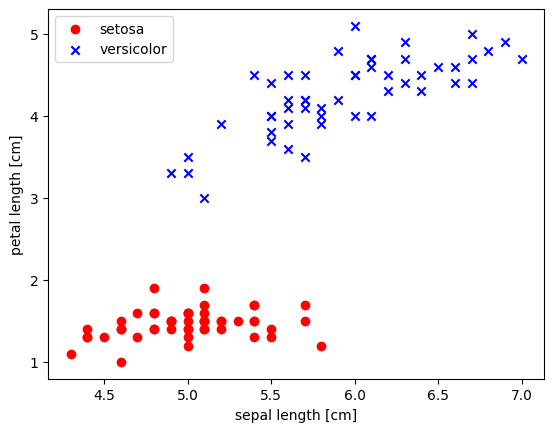

In [11]:
# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

用python实现感知分类器：

In [12]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of
          examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.erros_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.erros_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) > 0.0, 1, -1)

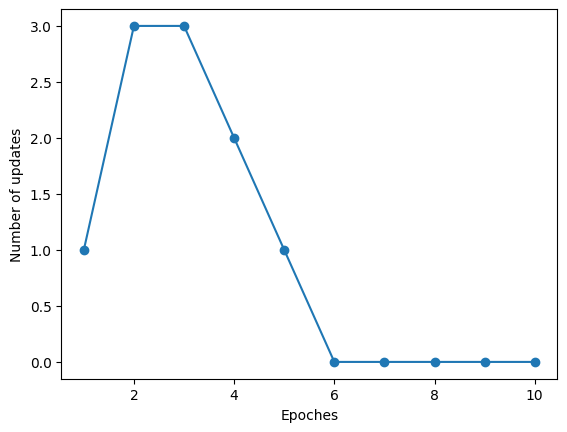

In [13]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.erros_) + 1), ppn.erros_, marker='o')
plt.xlabel('Epoches')
plt.ylabel('Number of updates')
plt.show()

正如上图显示的那样，感知器在第六次迭代后开始收敛，现在我们应该能够完美地对训练样本进行分类了。下面通过实现一个短小精干的函数来完成二维数据集决策边界的可视化：

In [14]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

首先，我们通过ListedColormap根据颜色列表来定义一些颜色和标记并创建色度图。然后，确定两个特征的最小值和最大值，通过调用NumPy的meshgrid函数，利用特征向量来创建网格数组对xx1和xx2。因为是在两个特征维度上训练感知器分类器，所以我们需要对网格数组进行扁平化，以创建一个与鸢尾花训练数据子集相同列数的矩阵，这样就可以调用predict方法来预测相应网格点的分类标签z。

在把预测获得的分类标签z改造成与xx1和xx2相同维数的网格后，现在可以通过调用Matplotlib的contourf函数画出轮廓图，把网格数组中的每个预测分类结果标注在不同颜色的决策区域。执行下面的代码后，我们可以看到对应的决策区域：

C:\Users\LangLang\AppData\Local\Temp\ipykernel_9648\1841755284.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


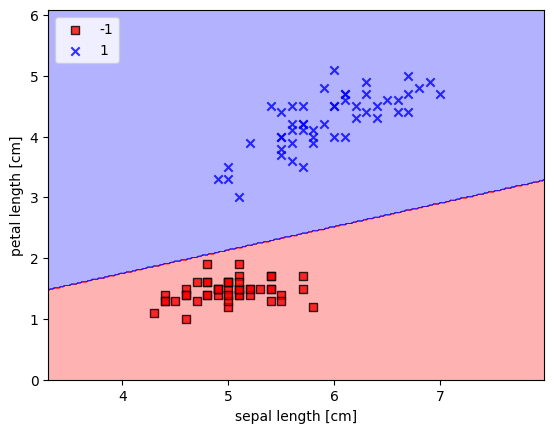

In [15]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## 用Python实现Adaline
因为感知器的算法规则与Adaline非常相近，这里将在前面的感知器实现的基础上修改fit方法，通过梯度下降最小化代价函数来更新权重。

In [16]:
class AdalineGD(object):
    """Adaptive Linear Neuron classifier
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the traing dataset.
    random_state : int
        Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : ld-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples
            is the nubmer of examples and
            n_features is the nubmer of features.
        y : array-like, shape = [n_examples]
            Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Returen class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

不像感知器那样在每次训练模型后都更新权重，我们根据整个训练数据集来计算梯度，调用`self.eta * errors.sum()`计算偏置单元（零权重），调用`self.eta *X.T.dot(errors)`计算从1到m的权重，这里`X.T.dot(errors)`是特征矩阵与误差向量的矩阵相乘。

请注意，`activation`方法对代码没有影响，因为它只是一个标识函数。在这里，我们添加激活函数（通过`activation`方法来计算）来说明信息是如何通过单层神经网络流动的：从输入数据、净输入、激活到输出。

与感知器类似，我们把所收集的代价存储在`self.cost_`列表，以检验训练后的算法是否收敛。

在实践中，我们经常需要通过实验找到可以达到最优收敛的最佳学习速率$η$。所以选择$η=0.1$和$η=0.0001$两个不同的学习速率，把代价函数与迭代次数的关系在图中画出，以便观察Adaline实现从训练数据中学习的情况。
下面的代码将根据两种不同的学习速率，画出代价与迭代次数之间的关系图：

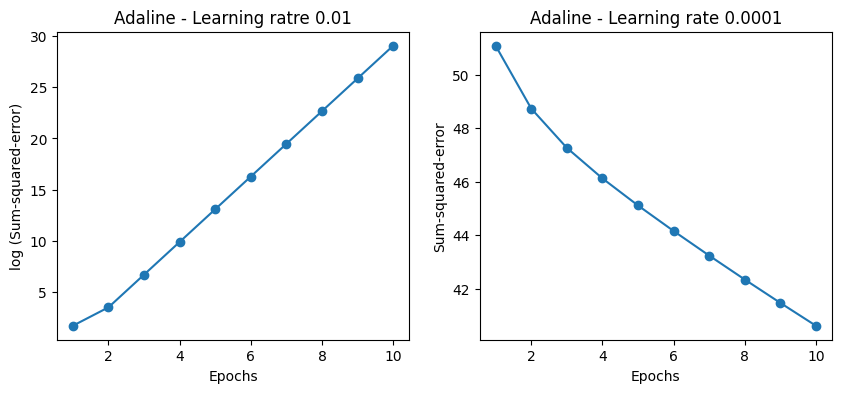

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log (Sum-squared-error)')
ax[0].set_title('Adaline - Learning ratre 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

从图中绘制的代价函数图可以看到，存在着两种不同类型的问题。左图显示选择学习速率太大将会出现的情况。因为所选的全局最小值太低，以至于代价函数无法最小化，结果误差经过每次迭代变得越来越大。另一方面，从右图可以看到代价在降低，但所选的学习速率η=0.0001太小，以至于算法需要经过多次迭代才能收敛到全局最低代价。